## Clusterização: agrupamento de clientes


## Aula 1 - Entendendo Aprendizado não-supervisionado

## Aula 2 - Obtendo os Clusters

### `Obtendo os dados`

In [25]:
import pandas as pd

df = pd.read_csv('./CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### `Organizando os dados`

In [26]:
# Retirando variavéis sem setido 
# "Tenure" ao final da tabela é o tempo que o contrato de crédito demora para ser renovado
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [27]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222


In [28]:
df.shape

(8950, 16)

In [29]:
# Vericando valores nulos
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [30]:
# Subistituindo valores nulos pela mediana
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [37]:
# Normalizando os dados para que haja não haja tanta discrepancia nos dados
from sklearn.preprocessing import Normalizer
df_norm = df.copy()

df_norm = Normalizer().fit_transform(df_norm)

### `Executando Clustering`

In [39]:
# instanciando Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(df_norm)

## Aula 3 - Entendendo os critérios e métricas de validação

### `Matemática do Silhouette`

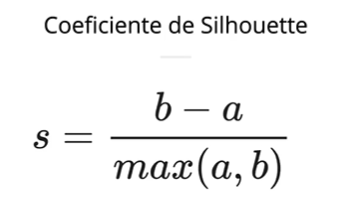

In [40]:
# Calculando silhueta
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(df_norm, labels, metric= 'euclidean')
print(silhouette)

0.36454314826693845


### Aula 4 - Entendendo e Calculando o Índice Davies-Bouldin

#### **Temos a fórmula de Davies-Bouldin**

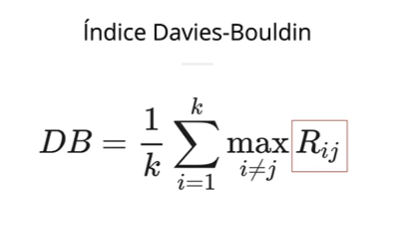

#### **"R" Evoca outra formula para ser calculado, e basicamente nos entrega uma medida de similaridade entre dois clusters, "i" e "j".**

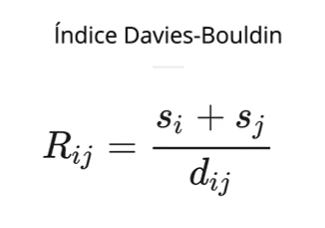

$s$ : Distancia média entre cada ponto do cluster e seu centroide para ter a **Similadirade dentro do cluster**

$d$ : Distancia entre os centroides dos clusters para ter a **Similadirade entre os clusters**

In [41]:
# Calculando o Davies-Bouldin

dbs = metrics.davies_bouldin_score(df_norm, labels)
print(dbs)

1.075812734747931


### Aula 5 - Entendendo e calculando o Índice Calinski Harabasz